# CPSC380: 4_Visualization_5_Seaborn

In this notebook, you will learn seaborn package, including:
 - box plot
 - scatter plot
 - kde plot
 - pair plot
 - joint plot
 - Subplotting with matplotlib and seaborn

 

In [90]:
import pandas as pd
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)

In [91]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

## 0. Loading Iris dataset

In [92]:
# Load the Iris flower dataset
iris=sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [93]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [94]:
# Let's see how many examples we have of each species
print (iris["species"].value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


## 1. Box plot

<AxesSubplot:xlabel='species', ylabel='petal_length'>

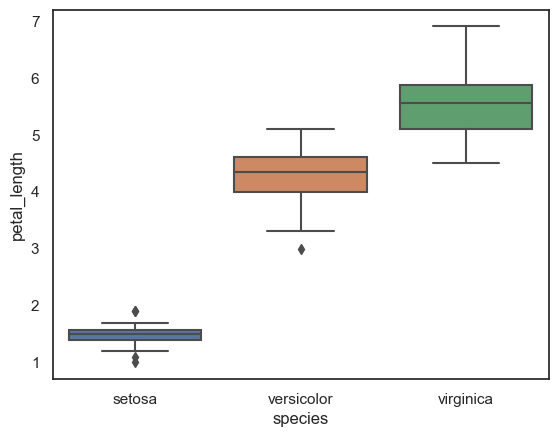

In [95]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="petal_length", data=iris)
#sns.boxplot(y="petal_length", data=iris)

## 2. Scatter plot

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

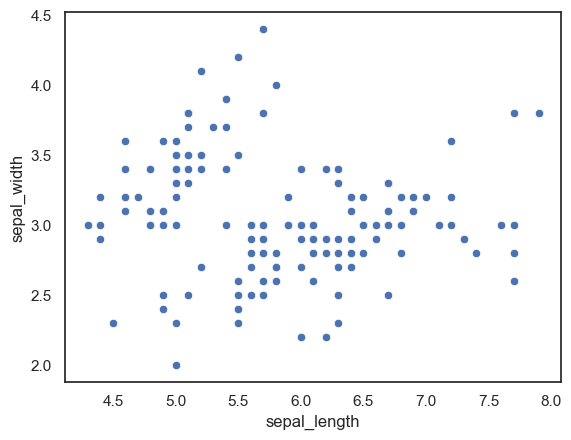

In [96]:
# Use Pandas dataframes to make a scatterplot of the Iris features.
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris)

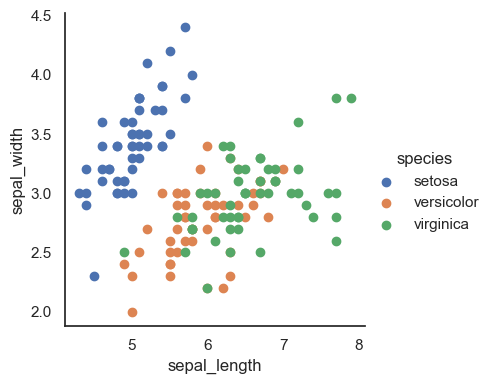

In [97]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

#### Another example : tips dataset

In [98]:
# loading of a dataframe from seaborn
tips = seaborn.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


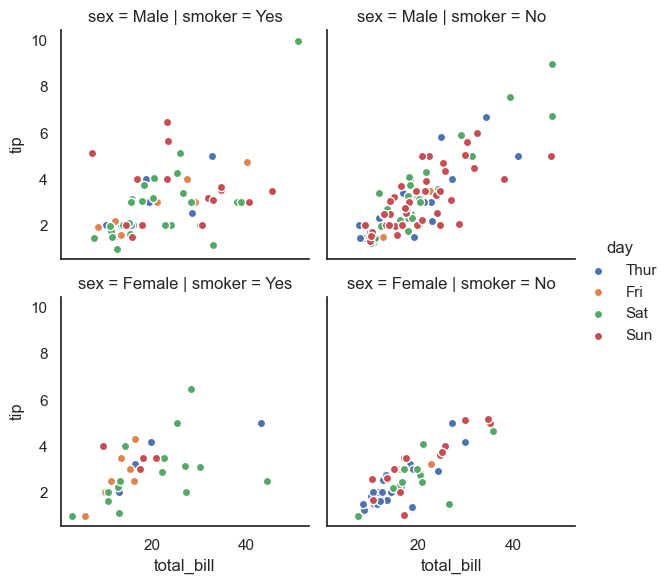

In [99]:
# Check smokers vs non-nonsmokers on giving tips 
seaborn.FacetGrid(tips, row = 'sex', col ="smoker",  hue ="day") \
                .map(plt.scatter, "total_bill", "tip", edgecolor ="w") \
                .add_legend()

## 3. Histogram and KDE plot

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


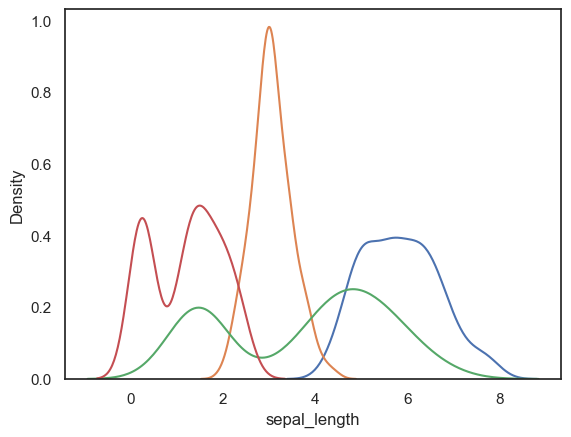

In [100]:
print(iris.columns)

for col in iris.columns[:-1]:
    sns.kdeplot(iris[col])

<AxesSubplot:ylabel='Density'>

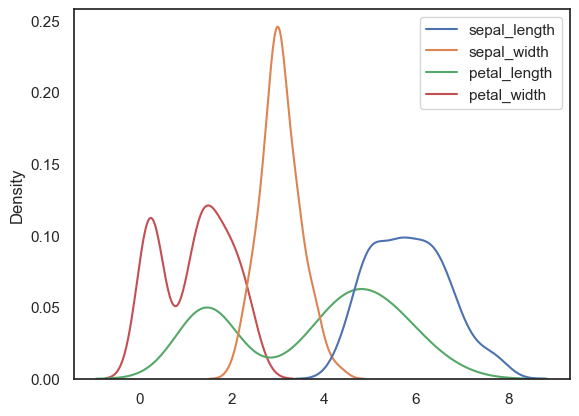

In [101]:
# do kde plots for all features together
sns.kdeplot(iris.drop(columns=iris.columns[-1], axis=1))

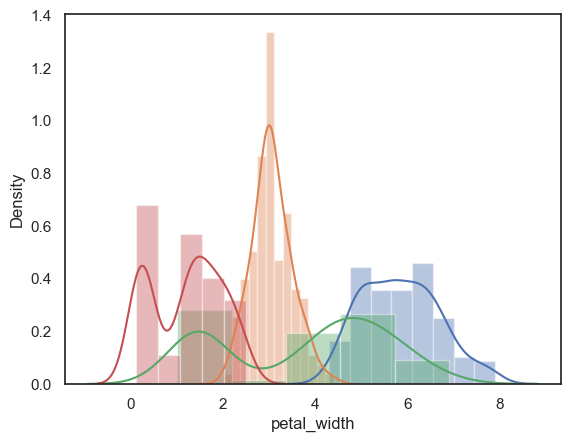

In [102]:
# histogram and kde combined
for col in iris.columns[:-1]:
    sns.distplot(iris[col])

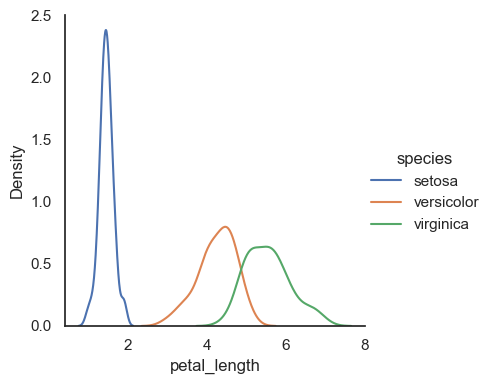

In [103]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="species", height=4) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

## 4. Pair plot

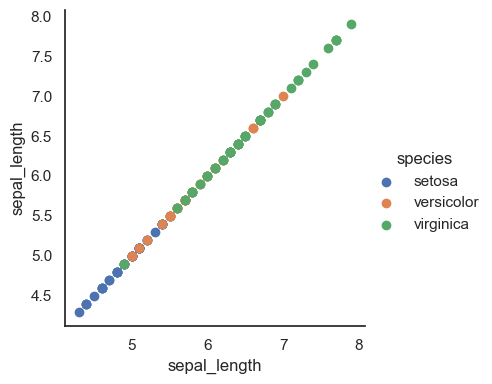

In [104]:
# scatterplot by itself
sns.FacetGrid(iris, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_length") \
   .add_legend()

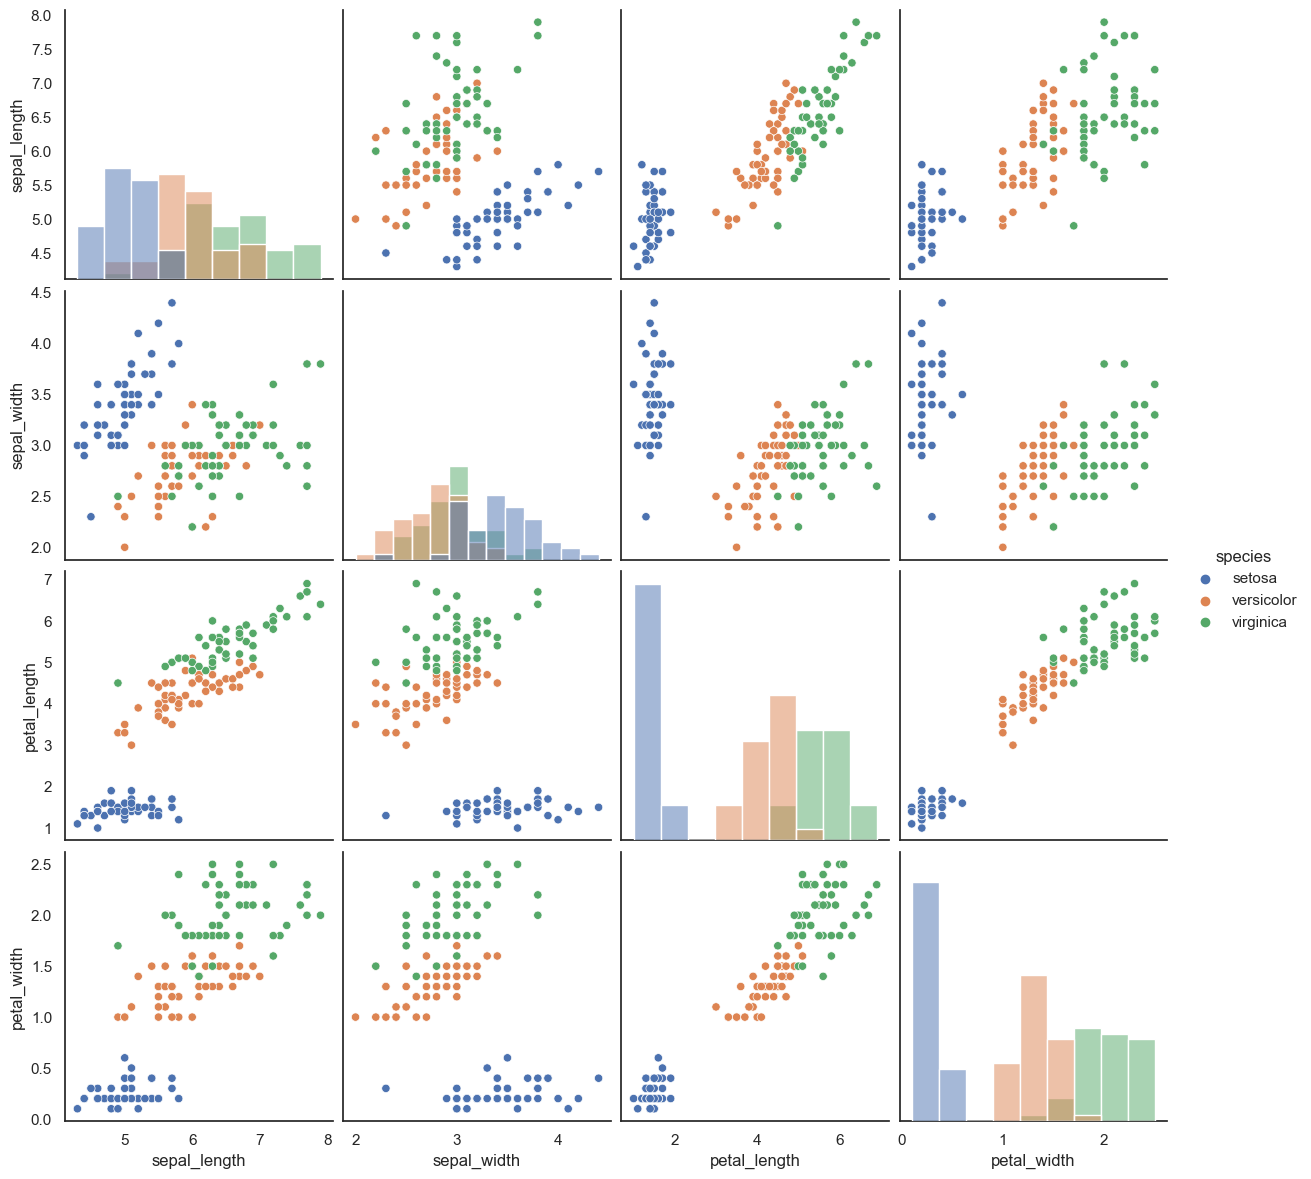

In [105]:
# Pairplot, which shows the bivariate relation between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris, hue="species", size=3, diag_kind="hist")

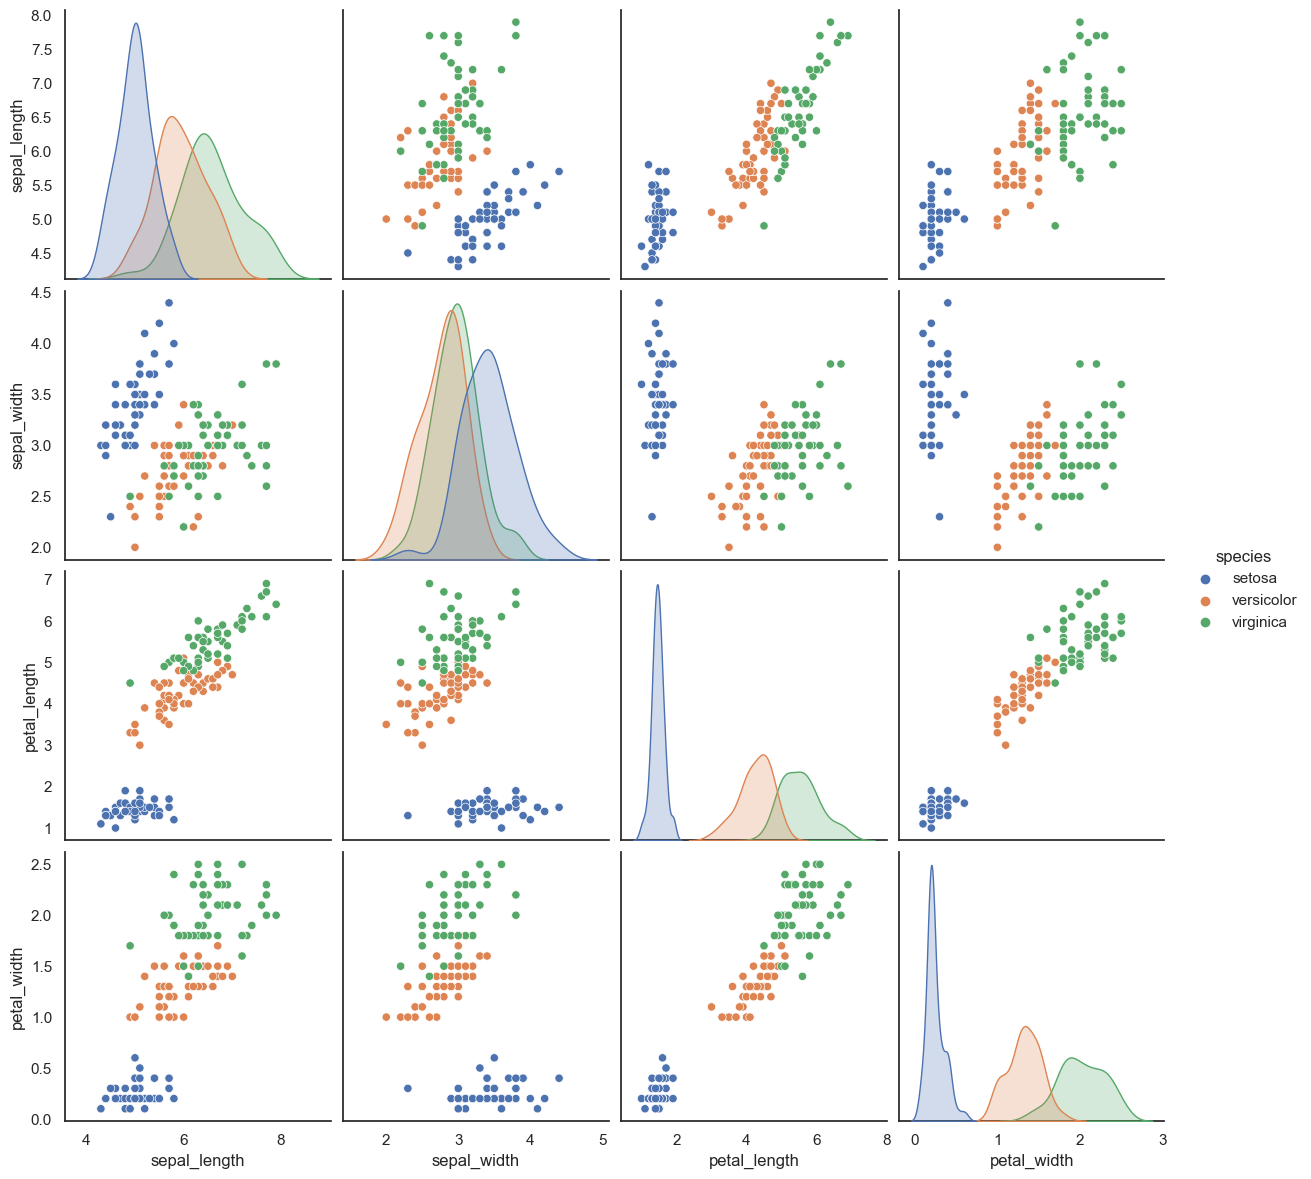

In [106]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris, hue="species", size=3, diag_kind="kde")


plt.show()

## 5. Joint plot

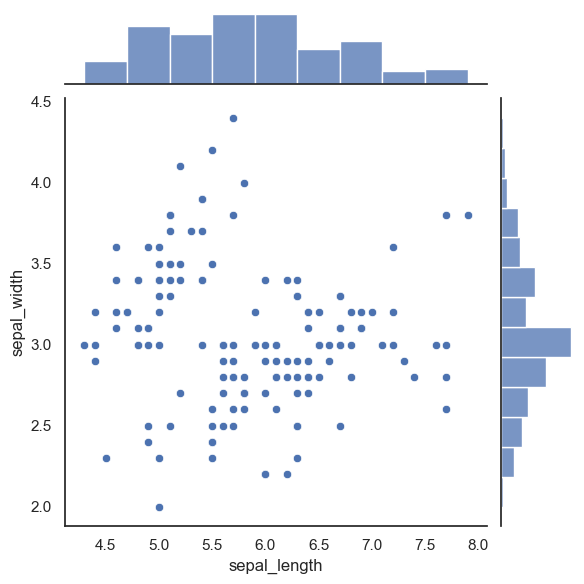

In [107]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

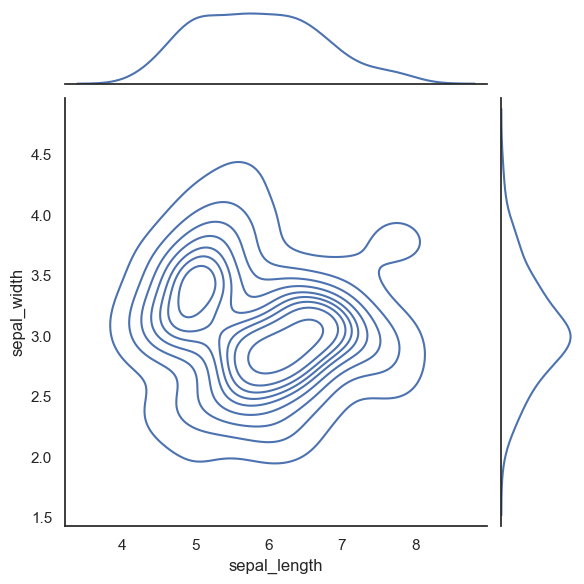

In [108]:
# A seaborn jointplot shows bivariate scatterplots and univariate kde
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='kde')

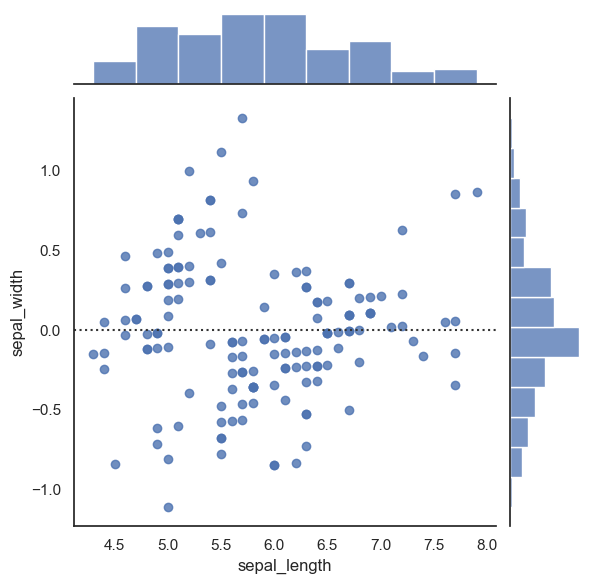

In [109]:
# A seaborn jointplot shows bivariate hexagonally based hostogram and univariate histogram
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='resid')

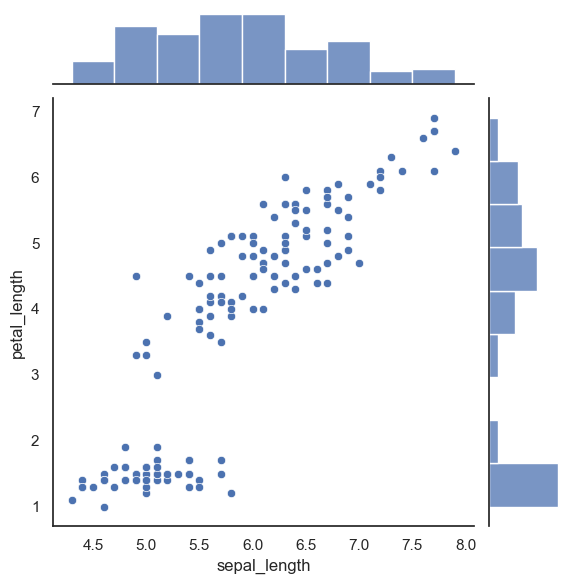

In [110]:
# A seaborn jointplot shows bivariate regression and univariate histogram + kde
sns.jointplot(x="sepal_length", y="petal_length", data=iris, kind='scatter')

## 6. Subplotting with matplotlib and seaborn 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


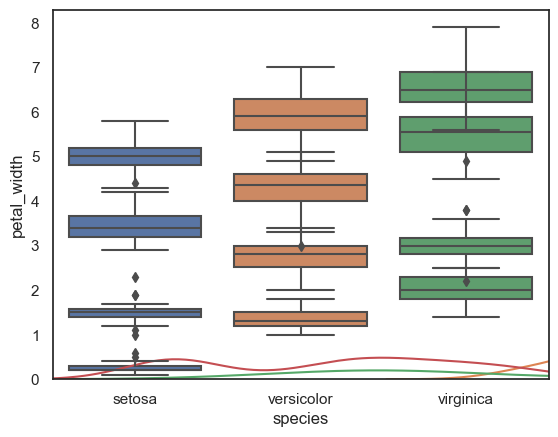

In [111]:
print(iris.columns)

for col in iris.columns[:-1]:
    sns.kdeplot(iris[col])
    sns.boxplot(x="species", y=col, data=iris)

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


<AxesSubplot:xlabel='species', ylabel='petal_width'>

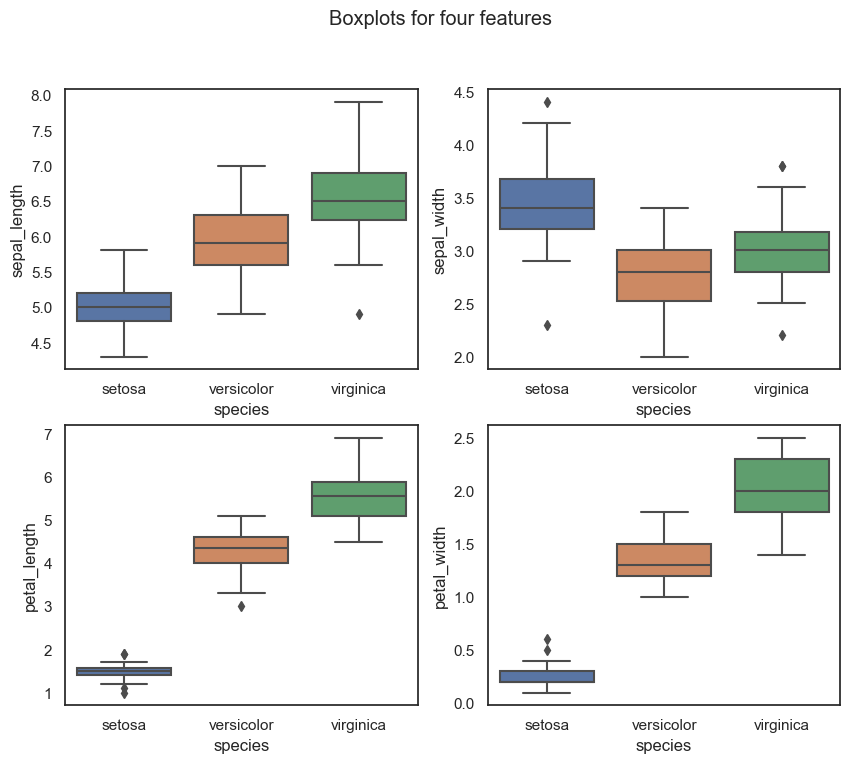

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
print (axes)

fig.suptitle('Boxplots for four features')
sns.boxplot(ax=axes[0, 0], data=iris, x=iris.columns[-1], y=iris.columns[0])
sns.boxplot(ax=axes[0, 1], data=iris, x=iris.columns[-1], y=iris.columns[1])
sns.boxplot(ax=axes[1, 0], data=iris, x=iris.columns[-1], y=iris.columns[2])
sns.boxplot(ax=axes[1, 1], data=iris, x=iris.columns[-1], y=iris.columns[3])

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

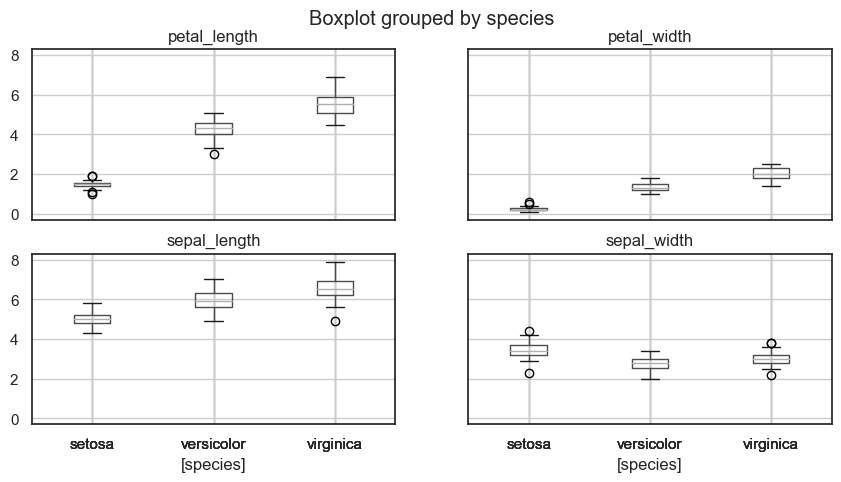

In [113]:
# Make a boxplot with Pandas on each feature split out by species
iris.boxplot(by="species", figsize=(10, 5))